# SW2: NFT Security - code
Detect RUG PULL via user input using SVM as the supervised model


##Read before use:
0. This ipynb file is meant to be run on Colab
1. Load data: When run on colab, upload the data file to the Google sheet. Put it under MyDrive, then make sure the file name in Google matches the address specified in the code. If not, make sure 'df' contains the data frame specified in the Rug Pull data file
2. SVM models: there are two versions of the SVM model for the user to select from.
Version 1: This model takes 8 features as model training input
Version 2: This model takes 5 features as model training input, excluding # of items, # of owners & total volume in ETH
3. Prediction output: when output is -1, it means the input is possibly NOT a Rug Pull, when the output is 1, it means the input is possibly a Rug Pull. There is also probability output available.
4. Evaluation part: It evaluates candidate supervised models' performance (SVM included). It also produces some visualizations.


##how to use:
After uploading data onto Google Sheet, run the first cell and give authorization for the code to access the file stored in Google sheet.
Then run the second cell if you want 8 features for model training
Run the third cell if you want 5 features for model training

In [ ]:

import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

#load data

#To read/write data from Google Drive:
#Reference: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveAå
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/My Drive/dataN416.xlsx') #make sure file name matches

Rugs = df.loc[df['rug pull'] == 1.0]
nRPs = Rugs.shape[0] # number of rug-pull collections
nColl = df.shape[0]


Mounted at /content/drive


##Version1: train model with all 8 features

In [ ]:

# use all features to train the model

X_sc = df.iloc[0:nColl,2:df.shape[1]]
y_sc = df.iloc[0:nColl, 1:2]

#-1:not detected, 0: not clear, 1: detected
#split set
X_train, X_test, y_train, y_test = train_test_split(X_sc, y_sc, test_size=0.2)

#data verifi.
#X_train.shape, y_train.shape, X_test.shape, y_test.shape, y_train

# Train model

from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=42)

svm.fit(X_train, y_train.values.ravel())

#print("Score of the SVM model in the training phase is:")
score = svm.score(X_test, y_test)

#Train the SVM model for prediction of user selected collection via user input
SVM = SVC(kernel='linear', C=1,  probability=True, random_state=42)

SVM.fit(X_sc, y_sc.values.ravel())

#get user input

print("You will need to enter 8 values to predict whether your selected collection has a high possibility of being a Rug Pull.")
# iterating the columns
for col in X_sc.columns:
    print(col)

#0 collection name
print("You can indicate the name of the collection")
Name = input()

#1 holders
print("1. Enter total number of owners of the collection : (enter an nonnegative integer, type -1 if no information available)")
while True:
    try:
        num_1 = int(input())
    except ValueError:
        print("Oops!  That was no valid integer.  Try again...")
        continue  # Value error, try again

    if num_1 >= -1:
        break  # Abort the infinite loop
    else :
        print("Oops!  That was no valid number.  Try again...")
        continue



#2 items
print("2. Total number of items within the collection (enter an nonnegative integer, type -1 if no information available) ")
while True:
    try:
      num_2 = int(input())
    except ValueError:
        print("Oops!  That was no valid integer.  Try again...")
        continue  # Value error, try again

    if num_2 >= -1:
        break  # Abort the infinite loop
    else :
        print("Oops!  That was no valid number.  Try again...")
        continue



#3 anonymity
print("3. Is the collection's founder anonymous? (1 for yes, -1 for no, type 0 if no information available) ")
while True:
    try:
        num_3 = int(input())
    except ValueError:
        print("Oops!  That was no valid integer.  Try again...")
        continue  # Value error, try again

    if num_3 == -1 or num_3 == 0 or num_3 == 1:
        break  # Abort the infinite loop
    else :
        print("Oops!  That was no valid number.  Try again by only typing -1,0 or 1...")
        continue




#4 community driven roadmap
print("4. Is the collection's Roadmap heavily community driven?  (1 for yes, -1 for no, type 0 if no information available) ")
while True:
    try:
        num_4 = int(input())
    except ValueError:
        print("Oops!  That was no valid integer.  Try again...")
        continue  # Value error, try again

    if num_4 == -1 or num_4 == 0 or num_4 == 1:
        break  # Abort the infinite loop
    else :
        print("Oops!  That was no valid number.  Try again by only typing -1,0 or 1...")
        continue


#5
print("5. Does the collection heavily mentioning DAO? (1 for yes, -1 for no, type 0 if no information available) ")
while True:
    try:
        num_5 = int(input())
    except ValueError:
        print("Oops!  That was no valid integer.  Try again...")
        continue  # Value error, try again

    if num_5 == -1 or num_5 == 0 or num_5 == 1:
        break  # Abort the infinite loop
    else :
        print("Oops!  That was no valid number.  Try again by only typing -1,0 or 1...")
        continue


#6
print("6. Is the collection suspended on OpenSea?  (1 for yes, -1 for no) ")
while True:
    try:
        num_6 = int(input())
    except ValueError:
        print("Oops!  That was no valid integer.  Try again...")
        continue  # Value error, try again

    if num_6 == -1 or num_6 == 1:
        break  # Abort the infinite loop
    else :
        print("Oops!  That was no valid number.  Try again by only typing -1or 1...")
        continue


#7
print("7. Enter collection's creator earning (enter an nonnegative value (if 5%, enter 5), type -1 if no information available):")
import math
while True:
    try:
        num_7 = float(input())
    except ValueError:
        print("Oops!  That was no valid number.  Try again...")
        continue  # Value error, try again

    if math.isclose(-1, num_7) or (num_7 <= 100.0 and num_7>=0.0):
        break  # Abort the infinite loop
    else :
        print("Oops!  That was no valid number.  Try again by only typing -1 or number between 0 and 100 (incl.)...")
        continue


#8
print("8. The collection's total trading volume in ETH (enter an nonnegative value, type -1 if no information available):")
while True:
    try:
        num_8 = float(input())
    except ValueError:
        print("Oops!  That was no valid number.  Try again...")
        continue  # Value error, try again

    if math.isclose(-1, num_8) or num_8 >=0:
        break  # Abort the infinite loop
    else :
        print("Oops!  That was no valid number.  Try again by only typing -1 or an non-negative number...")
        continue
data = {'owners(#)': [num_1], 'items(#)': [num_2], 'anonymity': [num_3],'hasAcommunityDrivenRoadmap': [num_4],'mentioningDAO': [num_5],'suspended(OpenSea)': [num_6],'creator earning (%)': [num_7], 'collection volume (ETH)': [num_8]}



userDF_X = pd.DataFrame(data)
prob= SVM.predict_proba(userDF_X)
user_RugPull = SVM.predict(userDF_X)
if  user_RugPull[0] == 1:
    print(Name, "is possibly a Rug Pull!")
    print("    Probability")
    print("---------------------")
    print("is a Rug | not a Rug")
    print(prob)
else:
    print(Name, "is possibly NOT a Rug Pull!")
    print("    Probability")
    print("---------------------")
    print("is a Rug | not a Rug")
    print(prob)




You will need to enter 8 values to predict whether your selected collection has a high possibility of being a Rug Pull.
owners(#)
items(#)
anonymity
hasAcommunityDrivenRoadmap
mentioningDAO
suspended(OpenSea)
creator earning (%)
collection volume (ETH)
You can indicate the name of the collection
crptopunks
1. Enter total number of owners of the collection : (enter an nonnegative integer, type -1 if no information available)
3799
2. Total number of items within the collection (enter an nonnegative integer, type -1 if no information available) 
5693
3. Is the collection's founder anonymous? (1 for yes, -1 for no, type 0 if no information available) 
-1
4. Is the collection's Roadmap heavily community driven?  (1 for yes, -1 for no, type 0 if no information available) 
-1
5. Does the collection heavily mentioning DAO? (1 for yes, -1 for no, type 0 if no information available) 
-1
6. Is the collection suspended on OpenSea?  (1 for yes, -1 for no) 
-1
7. Enter collection's creator earning (

## Version 2: Train model with 5 features
anonymity	hasAcommunityDrivenRoadmap	mentioningDAO	suspended(OpenSea)	creator earning (%)

In [ ]:
-# use only anonymity	hasAcommunityDrivenRoadmap	mentioningDAO	suspended(OpenSea)	creator earning (%) to train the model
X_sc2 = df.iloc[0:nColl,4:df.shape[1]-1]
y_sc2 = df.iloc[0:nColl, 1:2]

#-1:not detected, 0: not clear, 1: detected
#split set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_sc2, y_sc2, test_size=0.2)
X_train2


from sklearn.svm import SVC
svm2 = SVC(kernel='linear', C=1, random_state=42)

svm2.fit(X_train2, y_train2.values.ravel())

#print("Score of the SVM model in the training phase is:")
score2 = svm2.score(X_test2, y_test2)

#Train the SVM model for prediction of user selected collection via user input
SVM2 = SVC(kernel='linear', C=1, random_state=42) # add posibility

SVM2.fit(X_sc2, y_sc2.values.ravel())

# get user input

print("You will need to enter 5 values to predict whether your selected collection has a high possibility of being a Rug Pull.")
# iterating the columns
for col in X_sc2.columns:
    print(col)

#0 collection name
print("You can indicate the name of the collection")
Name = input()


#1 anonymity
print("1. Is the collection's founder anonymous? (1 for yes, -1 for no, type 0 if no information available) ")
while True:
    try:
        num_3 = int(input())
    except ValueError:
        print("Oops!  That was no valid integer.  Try again...")
        continue  # Value error, try again

    if num_3 == -1 or num_3 == 0 or num_3 == 1:
        break  # Abort the infinite loop
    else :
        print("Oops!  That was no valid number.  Try again by only typing -1,0 or 1...")
        continue




#2 community driven roadmap
print("2. Is the collection's Roadmap heavily community driven?  (1 for yes, -1 for no, type 0 if no information available) ")
while True:
    try:
        num_4 = int(input())
    except ValueError:
        print("Oops!  That was no valid integer.  Try again...")
        continue  # Value error, try again

    if num_4 == -1 or num_4 == 0 or num_4 == 1:
        break  # Abort the infinite loop
    else :
        print("Oops!  That was no valid number.  Try again by only typing -1,0 or 1...")
        continue


#3
print("3. Does the collection heavily mentioning DAO? (1 for yes, -1 for no, type 0 if no information available) ")
while True:
    try:
        num_5 = int(input())
    except ValueError:
        print("Oops!  That was no valid integer.  Try again...")
        continue  # Value error, try again

    if num_5 == -1 or num_5 == 0 or num_5 == 1:
        break  # Abort the infinite loop
    else :
        print("Oops!  That was no valid number.  Try again by only typing -1,0 or 1...")
        continue


#4
print("4. Is the collection suspended on OpenSea?  (1 for yes, -1 for no) ")
while True:
    try:
        num_6 = int(input())
    except ValueError:
        print("Oops!  That was no valid integer.  Try again...")
        continue  # Value error, try again

    if num_6 == -1 or num_6 == 1:
        break  # Abort the infinite loop
    else :
        print("Oops!  That was no valid number.  Try again by only typing -1or 1...")
        continue


#5
print("5. Enter collection's creator earning (enter an nonnegative value (if 5%, enter 5), type -1 if no information available):")
import math
while True:
    try:
        num_7 = float(input())
    except ValueError:
        print("Oops!  That was no valid number.  Try again...")
        continue  # Value error, try again

    if math.isclose(-1, num_7) or (num_7 <= 100.0 and num_7>=0.0):
        break  # Abort the infinite loop
    else :
        print("Oops!  That was no valid number.  Try again by only typing -1 or number between 0 and 100 (incl.)...")
        continue




data2 = {'anonymity': [num_1],'hasAcommunityDrivenRoadmap': [num_2],'mentioningDAO': [num_3],'suspended(OpenSea)': [num_4],'creator earning (%)': [num_5]}
userDF_X2 = pd.DataFrame(data2)
prob2= SVM.predict_proba(userDF_X)
user_RugPull2 = SVM2.predict(userDF_X2)

if  user_RugPull2[0] == 1:
    print(Name, "is possibly a Rug Pull!")
    print("    Probability")
    print("---------------------")
    print("is a Rug | not a Rug")
    print(prob2)
else:
    print(Name, "is possibly NOT a Rug Pull!")
    print("    Probability")
    print("---------------------")
    print("is a Rug | not a Rug")
    print(prob2)



SyntaxError: ignored

#Evaluation section

#0.print correlation matrix


In [ ]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

#1. Ridge classifier + cross_validation(LOOCV)



In [ ]:

from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
rdg = RidgeClassifier().fit(X_train,y_train)
rdg.predict(X_test), y_test, rdg.score(X_test, y_test)




/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([-1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,
        -1,  1]),
     rug pull
 38        -1
 49        -1
 89         1
 13        -1
 44        -1
 59        -1
 35        -1
 15        -1
 20        -1
 7         -1
 80         1
 16        -1
 56        -1
 5         -1
 0         -1
 91         1
 72        -1
 25        -1
 46        -1,
 0.7894736842105263)

In [ ]:
rdg2 = RidgeClassifier()
f1_macroRDG2 = cross_val_score(rdg2, X_sc, y_sc, scoring='f1_macro',cv=5)
precisionRDG2 = cross_val_score(rdg2, X_sc, y_sc, scoring='precision',cv=5)
recallRDG2 = cross_val_score(rdg2, X_sc, y_sc, scoring='recall',cv=5)


f1_macroRDG2, precisionRDG2, recallRDG2


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

(array([0.50434783, 0.72058824, 0.60416667, 0.42424242, 0.4375    ]),
 array([0.25, 1.  , 0.5 , 0.  , 0.  ]),
 array([1.        , 0.33333333, 0.25      , 0.        , 0.        ]))

In [ ]:
print ("RDG: Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test, rdg.predict(X_test), labels=[1, -1])))

RDG: Confusion Matrix
[[ 1  3]
 [ 0 15]]


In [ ]:
print ("RDG: Classification Report")

print ("{0}".format(metrics.classification_report(y_test, rdg.predict(X_test), labels=[1, -1])))

RDG: Classification Report
              precision    recall  f1-score   support

           1       1.00      0.25      0.40         4
          -1       0.83      1.00      0.91        15

    accuracy                           0.84        19
   macro avg       0.92      0.62      0.65        19
weighted avg       0.87      0.84      0.80        19



#2. Naive Bayes + LOOC

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train, y_train)
nb.predict(X_test), y_test, nb.score(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([-1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,
        -1,  1]),
     rug pull
 38        -1
 49        -1
 89         1
 13        -1
 44        -1
 59        -1
 35        -1
 15        -1
 20        -1
 7         -1
 80         1
 16        -1
 56        -1
 5         -1
 0         -1
 91         1
 72        -1
 25        -1
 46        -1,
 0.7368421052631579)

In [ ]:
nb2 = GaussianNB()
f1_macroNB2 = cross_val_score(nb2, X_sc, y_sc, scoring='f1_macro',cv=5)
precisionNB2 = cross_val_score(nb2, X_sc, y_sc, scoring='precision',cv=5)
recallNB2 = cross_val_score(nb2, X_sc, y_sc, scoring='recall',cv=5)


f1_macroNB2, precisionNB2, recallNB2

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

(array([0.20168067, 0.63461538, 0.75641026, 0.61449275, 0.35714286]),
 array([0.16666667, 0.33333333, 0.5       , 0.36363636, 0.        ]),
 array([1., 1., 1., 1., 0.]))

In [ ]:
print ("NB: Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test, nb.predict(X_test), labels=[1, -1])))

NB: Confusion Matrix
[[ 2  1]
 [ 4 12]]


In [ ]:
print ("NB: Classification Report")

print ("{0}".format(metrics.classification_report(y_test, nb.predict(X_test), labels=[1, -1])))

NB: Classification Report
              precision    recall  f1-score   support

           1       0.33      0.67      0.44         3
          -1       0.92      0.75      0.83        16

    accuracy                           0.74        19
   macro avg       0.63      0.71      0.64        19
weighted avg       0.83      0.74      0.77        19



#3. Logistic Regression + LOOC


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.7, random_state=42)
lr.fit(X_train, y_train)
lr.predict(X_test), y_test, lr.score(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,
        -1,  1]),
     rug pull
 38        -1
 49        -1
 89         1
 13        -1
 44        -1
 59        -1
 35        -1
 15        -1
 20        -1
 7         -1
 80         1
 16        -1
 56        -1
 5         -1
 0         -1
 91         1
 72        -1
 25        -1
 46        -1,
 0.8421052631578947)

In [ ]:
lr2 = LogisticRegression(C=0.7, random_state=42)

f1_macroLR2 = cross_val_score(lr2, X_sc, y_sc, scoring='f1_macro',cv=5)
precisionLR2 = cross_val_score(lr2, X_sc, y_sc, scoring='precision',cv=5)
recallLR2 = cross_val_score(lr2, X_sc, y_sc, scoring='recall',cv=5)


f1_macroLR2, precisionLR2, recallLR2

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

(array([0.54761905, 0.9124424 , 0.73732719, 0.40625   , 0.41935484]),
 array([0.27272727, 0.75      , 0.66666667, 0.        , 0.        ]),
 array([1. , 1. , 0.5, 0. , 0. ]))

In [ ]:
print ("LR: Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test, lr.predict(X_test), labels=[1, -1])))

LR: Confusion Matrix
[[ 2  1]
 [ 2 14]]


In [ ]:
print ("LR: Classification Report")

print ("{0}".format(metrics.classification_report(y_test, lr.predict(X_test), labels=[1, -1])))

LR: Classification Report
              precision    recall  f1-score   support

           1       0.50      0.67      0.57         3
          -1       0.93      0.88      0.90        16

    accuracy                           0.84        19
   macro avg       0.72      0.77      0.74        19
weighted avg       0.86      0.84      0.85        19



#4. Support vector Machine + LOOC

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=42)

svm.fit(X_train, y_train.values.ravel())
svm.predict(X_test), svm.score(X_test, y_test)

(array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,
        -1, -1]),
 0.8947368421052632)

In [ ]:
svm2 = SVC(kernel='linear', C=1, random_state=42)

f1_macroSVM2 = cross_val_score(svm2, X_sc, y_sc, scoring='f1_macro',cv=5)
precisionSVM2 = cross_val_score(svm2, X_sc, y_sc, scoring='precision',cv=5)
recallSVM2 = cross_val_score(svm2, X_sc, y_sc, scoring='recall',cv=5)


f1_macroSVM2, precisionSVM2, recallSVM2

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

(array([0.63461538, 0.9124424 , 0.80208333, 0.42424242, 0.4375    ]),
 array([0.33333333, 0.75      , 1.        , 0.        , 0.        ]),
 array([1. , 1. , 0.5, 0. , 0. ]))

In [ ]:
print ("SVM: Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test, svm.predict(X_test), labels=[1, -1])))

SVM: Confusion Matrix
[[ 2  1]
 [ 1 15]]


In [ ]:
print ("SVM: Classification Report")

print ("{0}".format(metrics.classification_report(y_test, svm.predict(X_test), labels=[1, -1])))

SVM: Classification Report
              precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
          -1       0.94      0.94      0.94        16

    accuracy                           0.89        19
   macro avg       0.80      0.80      0.80        19
weighted avg       0.89      0.89      0.89        19



#5. MLP classifier +LOOC

In [ ]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500, random_state=42)

ann.fit(X_train, y_train.values.ravel())
ann.predict(X_test), y_test, ann.score(X_test, y_test)


(array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1]),
     rug pull
 38        -1
 49        -1
 89         1
 13        -1
 44        -1
 59        -1
 35        -1
 15        -1
 20        -1
 7         -1
 80         1
 16        -1
 56        -1
 5         -1
 0         -1
 91         1
 72        -1
 25        -1
 46        -1,
 0.7894736842105263)

In [ ]:
ann2 = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500, random_state=42)

f1_macroMLP2 = cross_val_score(ann2, X_sc, y_sc, scoring='f1_macro',cv=5)
precisionMLP2 = cross_val_score(ann2, X_sc, y_sc, scoring='precision',cv=5)
recallMLP2 = cross_val_score(ann2, X_sc, y_sc, scoring='recall',cv=5)


f1_macroMLP2, precisionMLP2, recallMLP2

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when 

(array([0.45714286, 0.65454545, 0.65454545, 0.42424242, 0.45454545]),
 array([0. , 0.5, 1. , 0. , 0. ]),
 array([0.        , 0.33333333, 0.25      , 0.        , 0.        ]))

In [ ]:
print ("MLP ann: Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test, ann.predict(X_test), labels=[1, -1])))

MLP ann: Confusion Matrix
[[ 0  3]
 [ 1 15]]


In [ ]:
print ("MLP ann: Classification Report")

print ("{0}".format(metrics.classification_report(y_test, ann.predict(X_test), labels=[1, -1])))

MLP ann: Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
          -1       0.83      0.94      0.88        16

    accuracy                           0.79        19
   macro avg       0.42      0.47      0.44        19
weighted avg       0.70      0.79      0.74        19



#6. Decision Tree+ LOOC


In [ ]:

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train.values.ravel())
dt.predict(X_test), y_test, dt.score(X_test, y_test)

(array([-1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
        -1, -1]),
     rug pull
 38        -1
 49        -1
 89         1
 13        -1
 44        -1
 59        -1
 35        -1
 15        -1
 20        -1
 7         -1
 80         1
 16        -1
 56        -1
 5         -1
 0         -1
 91         1
 72        -1
 25        -1
 46        -1,
 0.7894736842105263)

In [ ]:
dt2 = DecisionTreeClassifier(random_state=42)

f1_macroDT2 = cross_val_score(dt2, X_sc, y_sc, scoring='f1_macro',cv=5)
precisionDT2 = cross_val_score(dt2, X_sc, y_sc, scoring='precision',cv=5)
recallDT2 = cross_val_score(dt2, X_sc, y_sc, scoring='recall',cv=5)


f1_macroDT2, precisionDT2, recallDT2

(array([0.36666667, 0.80208333, 0.9124424 , 0.73732719, 0.2173913 ]),
 array([0.2       , 0.66666667, 1.        , 0.66666667, 0.        ]),
 array([1.        , 0.66666667, 0.75      , 0.5       , 0.        ]))

In [ ]:
print ("DT: Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test, dt.predict(X_test), labels=[1, -1])))

DT: Confusion Matrix
[[ 1  2]
 [ 2 14]]


In [ ]:
print ("DT: Classification Report")

print ("{0}".format(metrics.classification_report(y_test, dt.predict(X_test), labels=[1, -1])))

DT: Classification Report
              precision    recall  f1-score   support

           1       0.33      0.33      0.33         3
          -1       0.88      0.88      0.88        16

    accuracy                           0.79        19
   macro avg       0.60      0.60      0.60        19
weighted avg       0.79      0.79      0.79        19



# 6.Model comparison



# F1_macro score

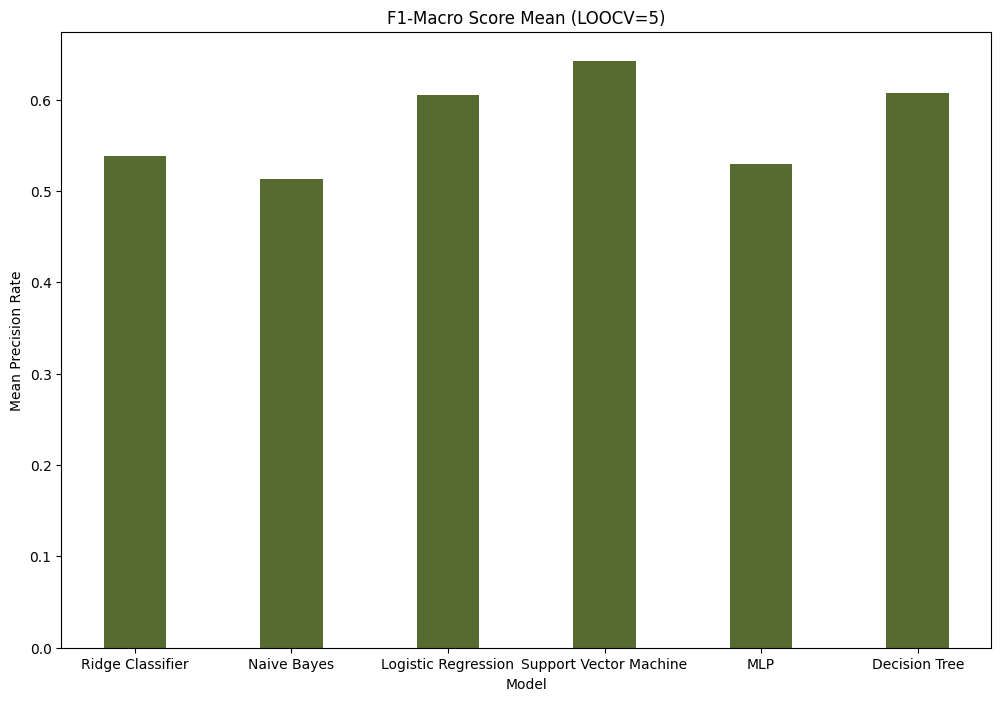

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Ridge Classifier':np.mean(f1_macroRDG2), 'Naive Bayes':np.mean(f1_macroNB2), 'Logistic Regression':np.mean(f1_macroLR2),
        'Support Vector Machine':np.mean(f1_macroSVM2), 'MLP':np.mean(f1_macroMLP2),'Decision Tree':np.mean(f1_macroDT2)}
model = list(data.keys())
mean_precision_Rate = list(data.values())

fig = plt.figure(figsize = (12, 8))

# creating the bar plot
plt.bar(model, mean_precision_Rate, color ='darkolivegreen',
        width = 0.4)

plt.xlabel("Model")
plt.ylabel("Mean Precision Rate")
plt.title("F1-Macro Score Mean (LOOCV=5)")
plt.show()


In [ ]:
np.mean(recallSVM2), recallSVM2

(0.5, array([1. , 1. , 0.5, 0. , 0. ]))

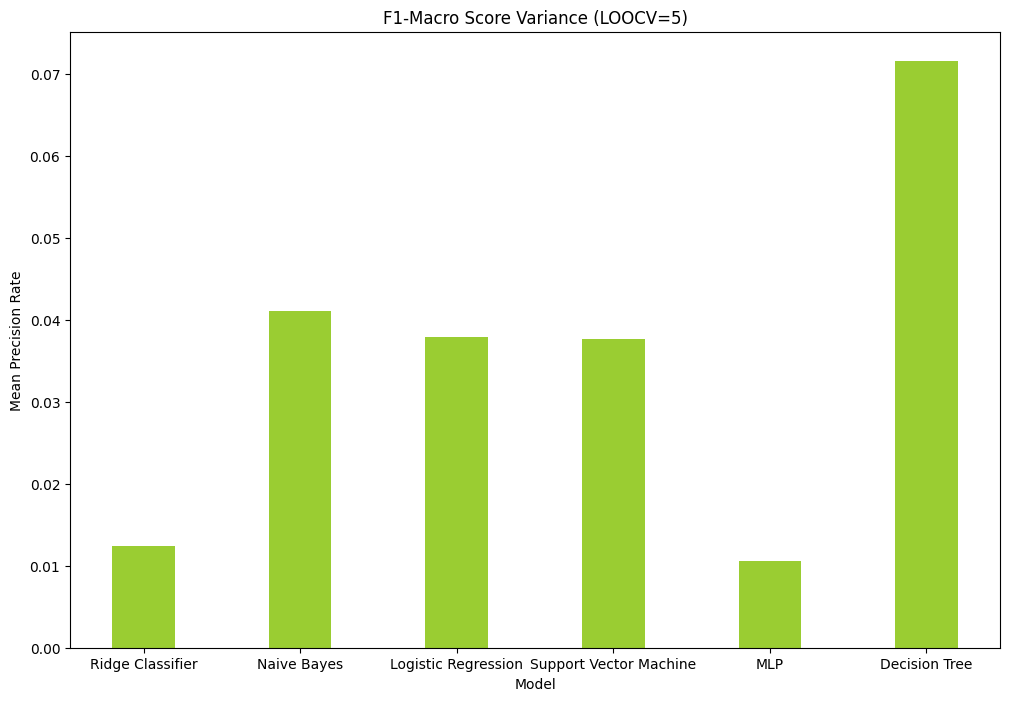

In [ ]:



# creating the dataset
data = {'Ridge Classifier':np.var(f1_macroRDG2), 'Naive Bayes':np.var(f1_macroNB2), 'Logistic Regression':np.var(f1_macroLR2),
        'Support Vector Machine':np.var(f1_macroSVM2), 'MLP':np.var(f1_macroMLP2),'Decision Tree':np.var(f1_macroDT2)}
model = list(data.keys())
mean_precision_Rate = list(data.values())

fig = plt.figure(figsize = (12, 8))

# creating the bar plot
plt.bar(model, mean_precision_Rate, color ='yellowgreen',
        width = 0.4)

plt.xlabel("Model")
plt.ylabel("Mean Precision Rate")
plt.title("F1-Macro Score Variance (LOOCV=5)")
plt.show()


#precision score

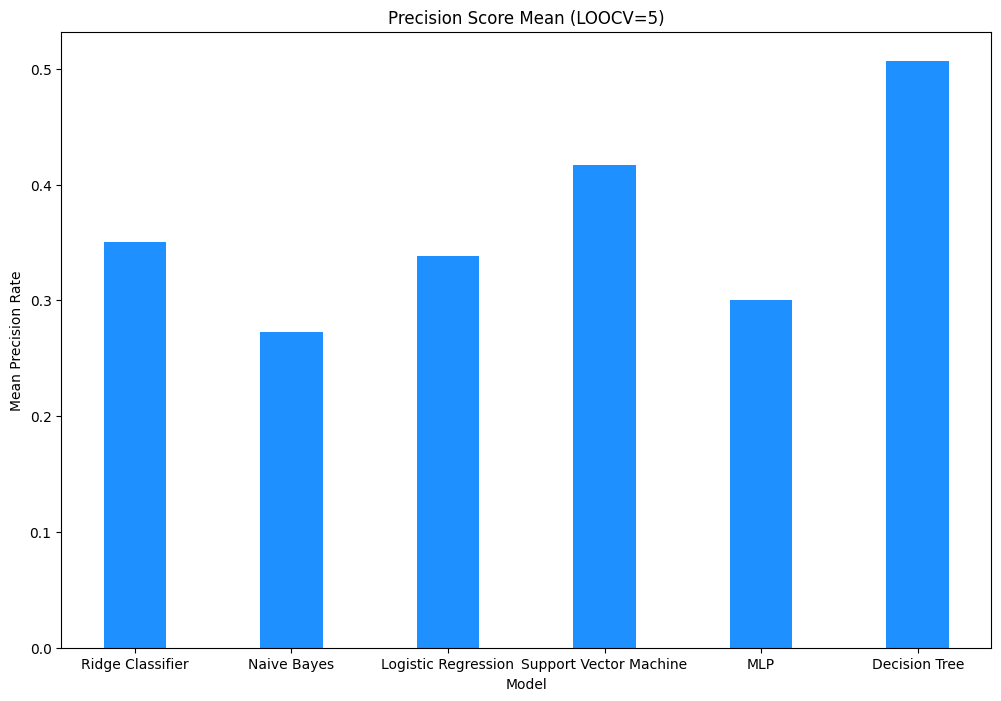

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Ridge Classifier':np.mean(precisionRDG2), 'Naive Bayes':np.mean(precisionNB2), 'Logistic Regression':np.mean(precisionLR2),
        'Support Vector Machine':np.mean(precisionSVM2), 'MLP':np.mean(precisionMLP2),'Decision Tree':np.mean(precisionDT2)}
model = list(data.keys())
mean_precision_Rate = list(data.values())

fig = plt.figure(figsize = (12, 8))

# creating the bar plot
plt.bar(model, mean_precision_Rate, color ='dodgerblue',
        width = 0.4)

plt.xlabel("Model")
plt.ylabel("Mean Precision Rate")
plt.title("Precision Score Mean (LOOCV=5)")
plt.show()


In [ ]:
np.mean(precisionDT2), np.mean(precisionNB2)

(0.5066666666666666, 0.27272727272727276)

In [ ]:
np.mean(recallNB2), recallNB2

(0.8, array([1., 1., 1., 1., 0.]))

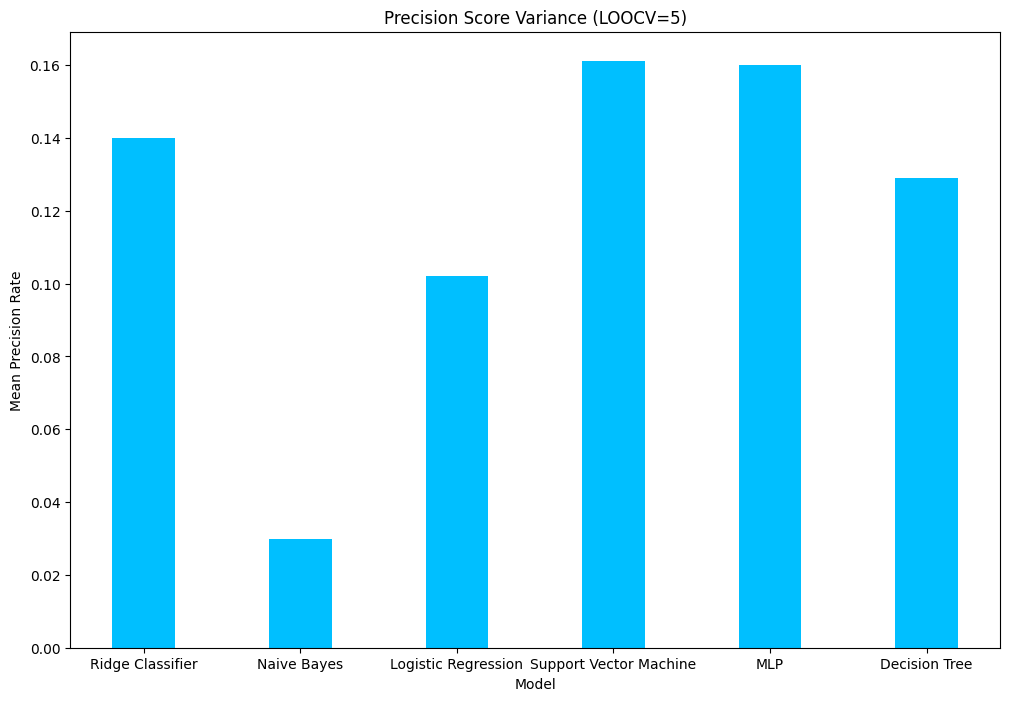

In [ ]:



# creating the dataset
data = {'Ridge Classifier':np.var(precisionRDG2), 'Naive Bayes':np.var(precisionNB2), 'Logistic Regression':np.var(precisionLR2),
        'Support Vector Machine':np.var(precisionSVM2), 'MLP':np.var(precisionMLP2),'Decision Tree':np.var(precisionDT2)}
model = list(data.keys())
mean_precision_Rate = list(data.values())

fig = plt.figure(figsize = (12, 8))

# creating the bar plot
plt.bar(model, mean_precision_Rate, color ='deepskyblue',
        width = 0.4)

plt.xlabel("Model")
plt.ylabel("Mean Precision Rate")
plt.title("Precision Score Variance (LOOCV=5)")
plt.show()


#recall score


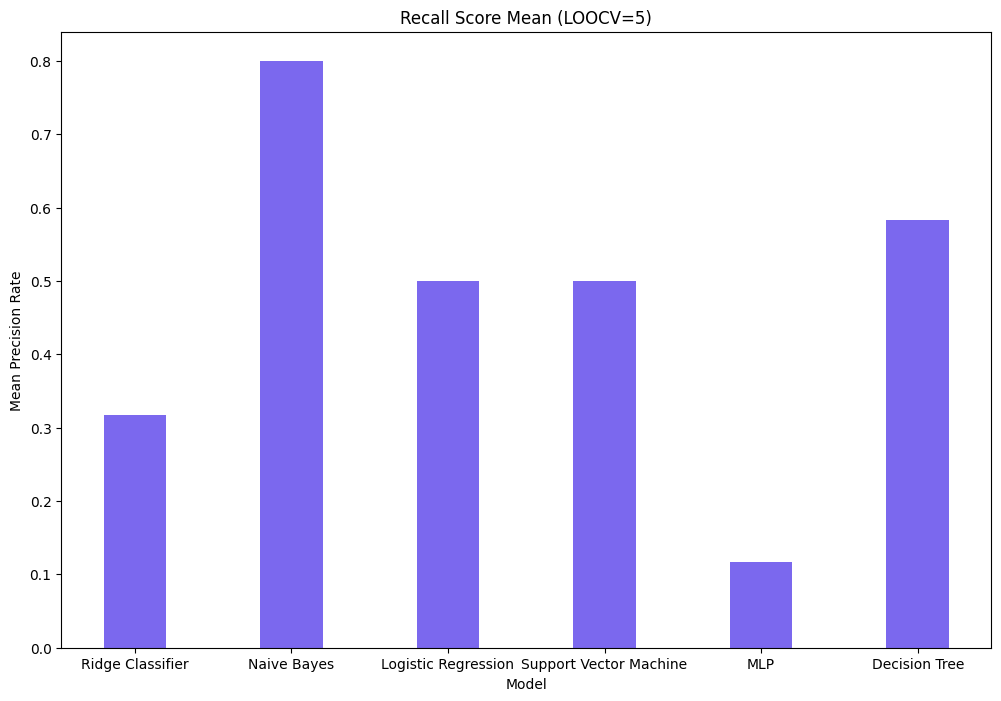

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Ridge Classifier':np.mean(recallRDG2), 'Naive Bayes':np.mean(recallNB2), 'Logistic Regression':np.mean(recallLR2),
        'Support Vector Machine':np.mean(recallSVM2), 'MLP':np.mean(recallMLP2),'Decision Tree':np.mean(recallDT2)}
model = list(data.keys())
mean_precision_Rate = list(data.values())

fig = plt.figure(figsize = (12, 8))

# creating the bar plot
plt.bar(model, mean_precision_Rate, color ='mediumslateblue',
        width = 0.4)

plt.xlabel("Model")
plt.ylabel("Mean Precision Rate")
plt.title("Recall Score Mean (LOOCV=5)")
plt.show()


In [ ]:
np.mean(recallNB2), np.mean(recallMLP2)

(0.8, 0.11666666666666665)

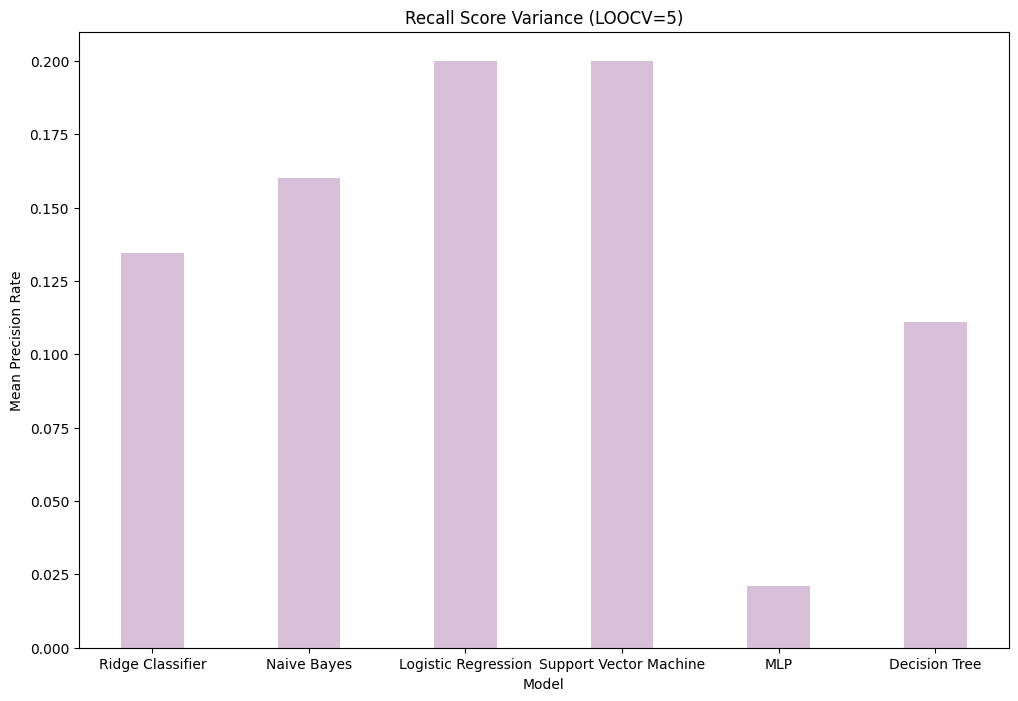

In [ ]:



# creating the dataset
data = {'Ridge Classifier':np.var(recallRDG2), 'Naive Bayes':np.var(recallNB2), 'Logistic Regression':np.var(recallLR2),
        'Support Vector Machine':np.var(recallSVM2), 'MLP':np.var(recallMLP2),'Decision Tree':np.var(recallDT2)}
model = list(data.keys())
mean_precision_Rate = list(data.values())

fig = plt.figure(figsize = (12, 8))

# creating the bar plot
plt.bar(model, mean_precision_Rate, color ='thistle',
        width = 0.4)

plt.xlabel("Model")
plt.ylabel("Mean Precision Rate")
plt.title("Recall Score Variance (LOOCV=5)")
plt.show()
